In [1]:
import query
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from statistics import fmean, mode

In [6]:
item_name = "Flask of Supreme Power"

In [7]:
df = query.get_historical_df(item_name)
#print(df.info())
#print("n={}\nTotal time elapsed {:5f}s\nMean time elapsed {:5f}s\nMode time elapsed {:5f}s".format(n, end-start, fmean(times), mode(times)))

In [8]:
def to_gold(df): return (df/100)/100
df.date = pd.to_datetime(df.date, format="%Y-%m-%dT%H:%M:%S.%fZ")
#print(df.date.head(10))
num_auc = df.num_auctions
quantity = df.quantity
mark_val = to_gold(df.market_value)
hist_val = to_gold(df.historical_value)
min_buy = to_gold(df.min_buyout)

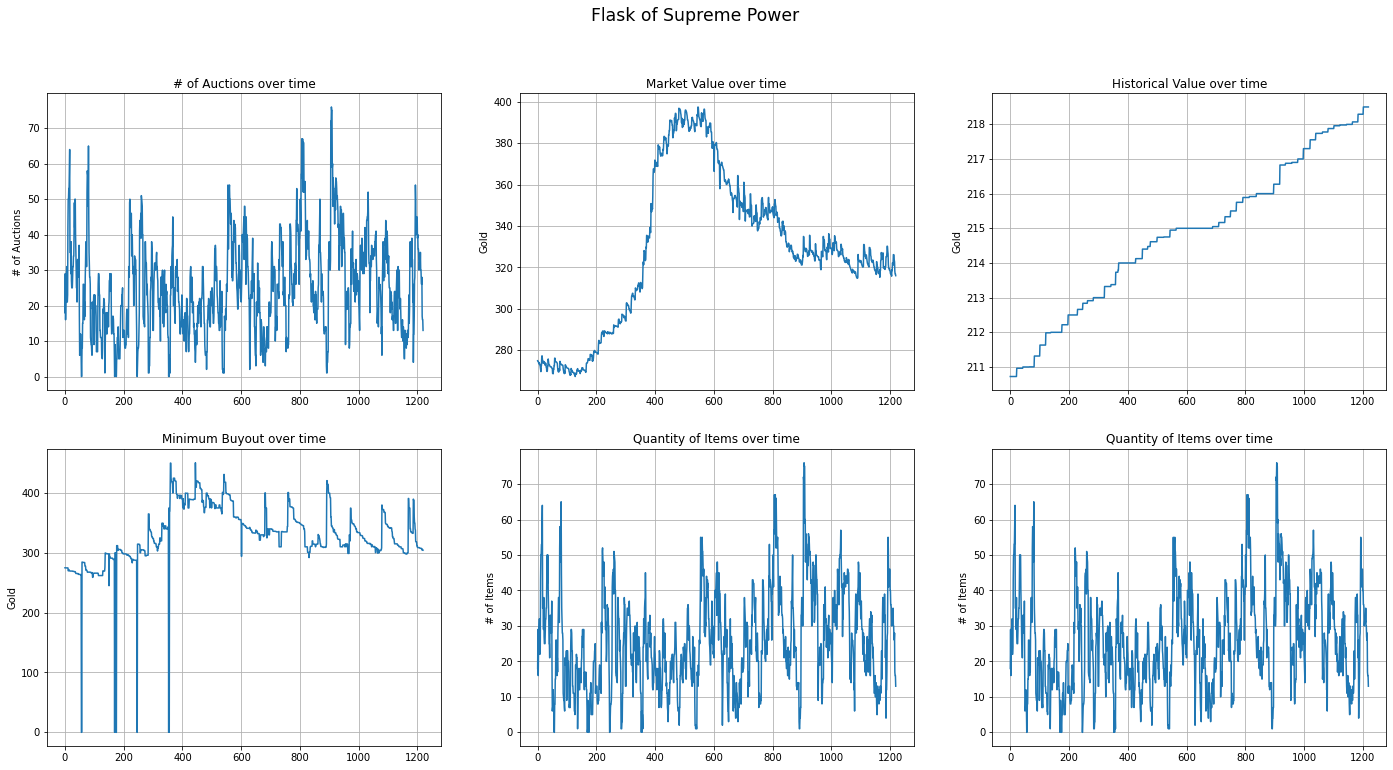

In [9]:
#define number of rows and columns for subplots
nrow=2
ncol=3
# make a list of all dataframes and features
df_list = [ 
    {'df': num_auc,
     'title': "# of Auctions over time",
     'ylabel': "# of Auctions"},
    {'df': mark_val,
     'title': "Market Value over time",
     'ylabel': "Gold"},
    {'df': hist_val,
     'title': "Historical Value over time",
     'ylabel': "Gold"},
    {'df': min_buy,
     'title': "Minimum Buyout over time",
     'ylabel': "Gold"},
    {'df': quantity,
     'title': "Quantity of Items over time",
     'ylabel': "# of Items"},
    {'df': quantity,
     'title': "Quantity of Items over time",
     'ylabel': "# of Items"}
]
fig, axes = plt.subplots(nrow, ncol)
plt.suptitle(t=item_name, size='xx-large')
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count]['df'].plot(
            ax=axes[r,c],
            title=df_list[count]['title'],
            ylabel=df_list[count]['ylabel'],
            grid=True,
            figsize=(24, 12)
        )
        count+=1


In [15]:
print("[All time] Market Value: {:+.2%} ({:+.3}g)"
      .format(
          1-(mark_val[0] / mark_val[-1]),
          mark_val[-1] - mark_val[0]
      )
)
print("[All time] Historical Value: {:+.2%} ({:+.3}g)"
      .format(
          1-(hist_val[0] / hist_val[-1]),
          hist_val[-1] - hist_val[0]
      )
)

print("[Current] Approx Market Capitalization: {:.2f}g"
     .format(
         quantity[-1] * mark_val[-1]
     )
)

KeyError: -1